In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install seaborn

You should consider upgrading via the 'c:\programdata\anaconda3\envs\condacorefenv\python.exe -m pip install --upgrade pip' command.


In [4]:
import seaborn as sns

In [74]:
df = pd.read_excel('20211217_IA_Data_Export.xlsx')

In [75]:
df.columns

Index(['ContractId Anon', 'Reliability', 'Score',
       'BASEUNIT_PRODUCTNAME (copy)', 'ACCESORY_NAME (copy)', 'UPSELL',
       'DAYS_ON_BOOKS', 'BASEUNIT_CONTRACTSTATUS', 'DELINQUENCY',
       'TOTAL_TOKEN_PAID'],
      dtype='object')

In [76]:
duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [ContractId Anon, Reliability, Score, BASEUNIT_PRODUCTNAME (copy), ACCESORY_NAME (copy), UPSELL, DAYS_ON_BOOKS, BASEUNIT_CONTRACTSTATUS, DELINQUENCY, TOTAL_TOKEN_PAID]
Index: []

In [77]:
df.shape

(14694, 10)

In [13]:
df.head()

ContractId Anon Reliability  Score BASEUNIT_PRODUCTNAME (copy)  \
0         31604231         Yes     77       Product 1 (large SHS)   
1         31604231         Yes     77       Product 1 (large SHS)   
2         31604231         Yes     77       Product 1 (large SHS)   
3         31604231         Yes     77       Product 1 (large SHS)   
4         31604231         Yes     77       Product 1 (large SHS)   

  ACCESORY_NAME (copy)  UPSELL  DAYS_ON_BOOKS BASEUNIT_CONTRACTSTATUS  \
0                  TV1    True              0                  ACTIVE   
1                  TV1    True              1                  ACTIVE   
2                  TV1    True              2                  ACTIVE   
3                  TV1    True              3                  ACTIVE   
4                  TV1    True              4                  ACTIVE   

   DELINQUENCY  TOTAL_TOKEN_PAID  
0            0                 0  
1            1                 0  
2           -1                 1  
3            0                 1  
4            1                 1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 10 columns):
ContractId Anon                14694 non-null int64
Reliability                    14694 non-null object
Score                          14694 non-null int64
BASEUNIT_PRODUCTNAME (copy)    14694 non-null object
ACCESORY_NAME (copy)           14694 non-null object
UPSELL                         14694 non-null bool
DAYS_ON_BOOKS                  14694 non-null int64
BASEUNIT_CONTRACTSTATUS        14694 non-null object
DELINQUENCY                    14694 non-null int64
TOTAL_TOKEN_PAID               14694 non-null int64
dtypes: bool(1), int64(5), object(4)
memory usage: 1.0+ MB


In [9]:
df.describe()

ContractId Anon         Score  DAYS_ON_BOOKS   DELINQUENCY  \
count     1.469400e+04  14694.000000   14694.000000  14694.000000   
mean      3.197680e+07     63.158568      22.749081     -3.215530   
std       3.503023e+05     11.895289      14.606497     16.061735   
min       3.160423e+07     28.000000       0.000000   -269.000000   
25%       3.170423e+07     56.000000      10.000000     -2.000000   
50%       3.176301e+07     63.000000      21.000000     -1.000000   
75%       3.230243e+07     71.000000      34.000000      0.000000   
max       3.287607e+07     90.000000      57.000000     44.000000   

       TOTAL_TOKEN_PAID  
count      14694.000000  
mean          21.213625  
std           24.723518  
min            0.000000  
25%            9.000000  
50%           18.000000  
75%           28.000000  
max          550.000000

## In Data Analysis What all things we do
1. Missing Values
2. Explore about Numerical Variables
3. Explore about categorical Variables
4. Finding Relationship between features

In [10]:
df.isnull().sum()

ContractId Anon                0
Reliability                    0
Score                          0
BASEUNIT_PRODUCTNAME (copy)    0
ACCESORY_NAME (copy)           0
UPSELL                         0
DAYS_ON_BOOKS                  0
BASEUNIT_CONTRACTSTATUS        0
DELINQUENCY                    0
TOTAL_TOKEN_PAID               0
dtype: int64

In [11]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

<AxesSubplot:>

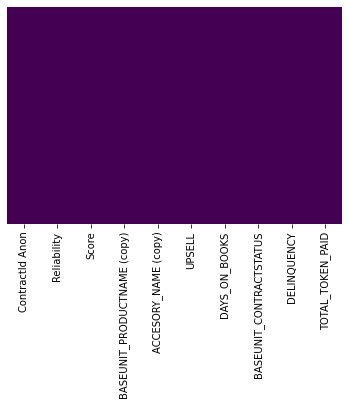

In [12]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [14]:
df['repayment performance'] = df['TOTAL_TOKEN_PAID']/df['DAYS_ON_BOOKS']

In [17]:
df

ContractId Anon Reliability  Score BASEUNIT_PRODUCTNAME (copy)  \
0             31604231         Yes     77       Product 1 (large SHS)   
1             31604231         Yes     77       Product 1 (large SHS)   
2             31604231         Yes     77       Product 1 (large SHS)   
3             31604231         Yes     77       Product 1 (large SHS)   
4             31604231         Yes     77       Product 1 (large SHS)   
...                ...         ...    ...                         ...   
14689         32876071         Yes     44       Product 1 (large SHS)   
14690         32876071         Yes     44       Product 1 (large SHS)   
14691         32876071         Yes     44       Product 1 (large SHS)   
14692         32876071         Yes     44       Product 1 (large SHS)   
14693         32876071         Yes     44       Product 1 (large SHS)   

      ACCESORY_NAME (copy)  UPSELL  DAYS_ON_BOOKS BASEUNIT_CONTRACTSTATUS  \
0                      TV1    True              0                  ACTIVE   
1                      TV1    True              1                  ACTIVE   
2                      TV1    True              2                  ACTIVE   
3                      TV1    True              3                  ACTIVE   
4                      TV1    True              4                  ACTIVE   
...                    ...     ...            ...                     ...   
14689         No Accessory   False             10                  ACTIVE   
14690         No Accessory   False             11                  ACTIVE   
14691         No Accessory   False             12                  ACTIVE   
14692         No Accessory   False             13                  ACTIVE   
14693         No Accessory   False             14                  ACTIVE   

       DELINQUENCY  TOTAL_TOKEN_PAID  repayment performance  
0                0                 0                    NaN  
1                1                 0               0.000000  
2               -1                 1               0.500000  
3                0                 1               0.333333  
4                1                 1               0.250000  
...            ...               ...                    ...  
14689           -5                15               1.500000  
14690           -4                15               1.363636  
14691           -3                15               1.250000  
14692           -2                15               1.153846  
14693           -1                15               1.071429  

[14694 rows x 11 columns]

In [71]:
new_df_ = df[['Score','DAYS_ON_BOOKS', 'DELINQUENCY', 'TOTAL_TOKEN_PAID']]
new_df_

Score  DAYS_ON_BOOKS  DELINQUENCY  TOTAL_TOKEN_PAID
0         77              0            0                 0
1         77              1            1                 0
2         77              2           -1                 1
3         77              3            0                 1
4         77              4            1                 1
5         77              5            2                 1
6         77              6            3                 1
7         77              7            4                 1
8         77              8           -1                 2
9         77              9            0                 2
10        77             10            1                 2
11        77             11           -1                 3
12        77             12            0                 3
13        77             13           -1                 4
14        77             14            0                 4
15        77             15            1                 4
16        77             16            2                 4
17        77             17            3                 4
18        77             18            4                 4
19        77             19            5                 4
20        77             20            6                 4
21        77             21            7                 4
22        77             22           -1                 5
23        77             23            0                 5
24        77             24            2                 5
25        77             25            2                 5
26        77             26            3                 5
27        77             27            4                 5
28        77             28            5                 5
29        77             29           -3                 8
30        77             30           -2                 8
31        77             31           -1                 8
32        77             32            0                 8
33        77             33            1                 8
34        77             34            2                 8
35        77             35            3                 8
36        77             36            4                 8
37        77             37            5                 8
38        77             38            6                 8
39        77             39            7                 8
40        77             40            8                 8
41        77             41           -1                 9
42        77             42            0                 9
43        77             43            2                 9
44        77             44            2                 9
45        77             45           -1                10
46        77             46            0                10
47        77             47            1                10
48        77             48            2                10
49        77             49            3                10
50        77             50            4                10
51        77             51            5                10
52        77             52            6                10
53        77             53            7                10
54        77             54            8                10
55        77             55            9                10
56        77             56           10                10
57        77             57           11                10
58        62              0           -8                 8
59        62              1           -8                 9
60        62              2           -7                 9
61        62              3           -8                11
62        62              4           -7                11
63        62              5           -6                11
64        62              6           -5                11
65        62              7           -5                12
66        62              8           -5              

In [36]:
# new_df = df[df['repayment performance']== inf]
df1 = df[(df == np.inf).any(axis=1)]
df1
# rows_with_inf = df[df.apply(lambda x: any(np.isinf(x)), axis=1)]

ContractId Anon Reliability  Score BASEUNIT_PRODUCTNAME (copy)  \
58            31610571         Yes     62       Product 1 (large SHS)   
116           31620571         Yes     73       Product 1 (large SHS)   
173           31622411         Yes     59       Product 1 (large SHS)   
230           31623051         Yes     78       Product 1 (large SHS)   
287           31623891         Yes     69       Product 1 (large SHS)   
...                ...         ...    ...                         ...   
14581         32663651         Yes     59       Product 1 (large SHS)   
14606         32697791         Yes     70       Product 1 (large SHS)   
14647         32854171         Yes     49     Product 5 (phone - new)   
14663         32855911         Yes     53       Product 1 (large SHS)   
14679         32876071         Yes     44       Product 1 (large SHS)   

      ACCESORY_NAME (copy)  UPSELL  DAYS_ON_BOOKS BASEUNIT_CONTRACTSTATUS  \
58                     TV1   False              0                  ACTIVE   
116                    TV1    True              0                  ACTIVE   
173                    TV1    True              0                  ACTIVE   
230           No Accessory   False              0                  ACTIVE   
287           No Accessory   False              0                  ACTIVE   
...                    ...     ...            ...                     ...   
14581         No Accessory   False              0                  ACTIVE   
14606         No Accessory   False              0                  ACTIVE   
14647         No Accessory   False              0                  ACTIVE   
14663         No Accessory   False              0                  ACTIVE   
14679         No Accessory   False              0                  ACTIVE   

       DELINQUENCY  TOTAL_TOKEN_PAID  repayment performance  
58              -8                 8                    inf  
116             -5                 5                    inf  
173             -1                 1                    inf  
230             -1                 1                    inf  
287             -3                 3                    inf  
...            ...               ...                    ...  
14581           -1                 1                    inf  
14606           -1                 1                    inf  
14647          -59                59                    inf  
14663          -14                14                    inf  
14679           -1                 1                    inf  

[281 rows x 11 columns]

In [37]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['ContractId Anon', 'Score', 'DAYS_ON_BOOKS', 'DELINQUENCY',
       'TOTAL_TOKEN_PAID', 'repayment performance'],
      dtype='object')

In [38]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Reliability', 'BASEUNIT_PRODUCTNAME (copy)', 'ACCESORY_NAME (copy)',
       'BASEUNIT_CONTRACTSTATUS'],
      dtype='object')

In [39]:
correlation = numeric_features.corr()
print(correlation['Score'].sort_values(ascending = False), '\n')

Score                    1.000000
repayment performance    0.034840
TOTAL_TOKEN_PAID         0.034294
DAYS_ON_BOOKS            0.006589
ContractId Anon         -0.016046
DELINQUENCY             -0.037762
Name: Score, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Score'}>

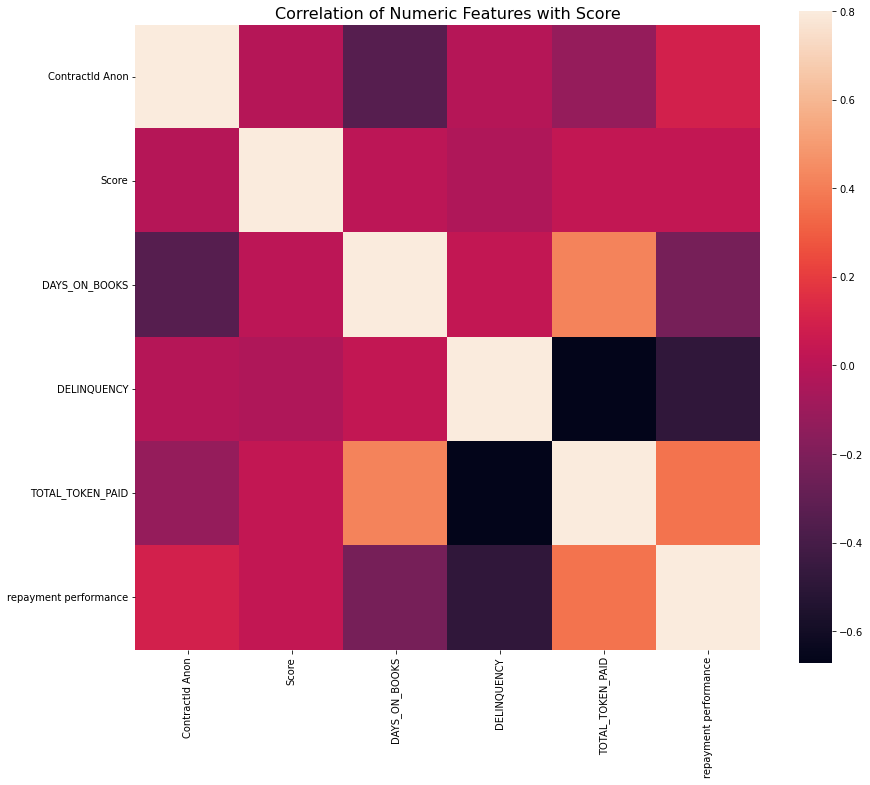

In [64]:
f, ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Score', y=1, size=16)

sns.heatmap(correlation, square = True, vmax=0.8)

## Following are the observations from above heat map for Numerical Features
1. "Repayment Performance" and "Score" has the positive correlation between them. Although the correlation value is very small.
2. We may skip one of the features out of ("Repayment Performance" , "TOTAL_TOKEN_PAID") when training our machine learning model. because both of these ("Repayment Performance" , "TOTAL_TOKEN_PAID") features have the same correlation with the "Score" feature.
3. "DELINQUENCY" and "Score" has the negative correlation between them. Although the correlation value is very small. but if the "DELINQUENCY" feature increases then "Score" will tend to decrease.

In [43]:
df.UPSELL.value_counts()

False    10023
True      4671
Name: UPSELL, dtype: int64

In [97]:
df['ContractId Anon'].value_counts()

31693731    108
31713691    106
32400871    105
31990311    100
31792031    100
31993051     98
32275131     78
32306011     76
31604231     58
31610571     58
31623051     57
31635611     57
31635271     57
31635651     57
31635931     57
31639711     57
31634711     57
31633431     57
31625371     57
31620571     57
31637291     57
31633871     57
31626751     57
31634011     57
31634651     57
31633711     57
31638811     57
31635631     57
31622411     57
31623891     57
31639431     57
31624811     57
31636671     57
31642451     56
31655031     56
31651431     56
31657131     56
31642191     56
31661431     56
31642071     56
31660551     56
31657511     56
31641811     56
31655871     56
31649051     56
31645051     56
31653731     56
31644851     56
31674251     55
31681011     55
31671671     55
31674751     55
31666571     55
31682091     55
31664311     55
31673531     55
31666971     55
31700731     54
31704831     54
31694471     54
31706971     54
31710591     54
31703091

### Observations

Below are the top 10 customers ids which are having most no. of contracts -

0. Contract Id count
1. 31693731    108
2. 31713691    106
3. 32400871    105
4. 31990311    100
5. 31792031    100
6. 31993051     98
7. 32275131     78
8. 32306011     76
9. 31604231     58
10. 31610571     58


In [96]:
df['ContractId Anon'].unique().shape

(327,)

In [44]:
df.Reliability.value_counts()

Yes    14694
Name: Reliability, dtype: int64

In [79]:
df['BASEUNIT_PRODUCTNAME (copy)'].value_counts()

Product 1 (large SHS)      13942
Product 7 (phone - new)      338
Product 3 (small SHS)        121
Product 8 (phone - new)      102
Product 2 (large SHS)         96
Product 5 (phone - new)       95
Name: BASEUNIT_PRODUCTNAME (copy), dtype: int64

### Observation
1. 'Product 1 (large SHS)' has the most number of contract ids associated with it.

In [98]:
scores_product_wise =df.groupby(['ContractId Anon','BASEUNIT_PRODUCTNAME (copy)']).size().reset_index().rename(columns={0:'ContractId product wise Count'})
scores_product_wise

ContractId Anon BASEUNIT_PRODUCTNAME (copy)  \
0           31604231       Product 1 (large SHS)   
1           31610571       Product 1 (large SHS)   
2           31620571       Product 1 (large SHS)   
3           31622411       Product 1 (large SHS)   
4           31623051       Product 1 (large SHS)   
5           31623891       Product 1 (large SHS)   
6           31624811       Product 1 (large SHS)   
7           31625371       Product 1 (large SHS)   
8           31626751       Product 1 (large SHS)   
9           31633431     Product 7 (phone - new)   
10          31633711       Product 1 (large SHS)   
11          31633871       Product 1 (large SHS)   
12          31634011       Product 1 (large SHS)   
13          31634651       Product 1 (large SHS)   
14          31634711       Product 1 (large SHS)   
15          31635271       Product 1 (large SHS)   
16          31635611       Product 1 (large SHS)   
17          31635631       Product 1 (large SHS)   
18          31635651       Product 1 (large SHS)   
19          31635931       Product 1 (large SHS)   
20          31636671       Product 1 (large SHS)   
21          31637291       Product 1 (large SHS)   
22          31638811       Product 1 (large SHS)   
23          31639431     Product 7 (phone - new)   
24          31639711       Product 1 (large SHS)   
25          31641811       Product 1 (large SHS)   
26          31642071       Product 1 (large SHS)   
27          31642191       Product 1 (large SHS)   
28          31642451       Product 1 (large SHS)   
29          31644851       Product 1 (large SHS)   
30          31645051       Product 1 (large SHS)   
31          31649051       Product 1 (large SHS)   
32          31651431       Product 1 (large SHS)   
33          31653731       Product 1 (large SHS)   
34          31655031       Product 1 (large SHS)   
35          31655871       Product 1 (large SHS)   
36          31657131       Product 1 (large SHS)   
37          31657511       Product 1 (large SHS)   
38          31660551       Product 1 (large SHS)   
39          31661431       Product 1 (large SHS)   
40          31664311       Product 1 (large SHS)   
41          31666571       Product 1 (large SHS)   
42          31666971       Product 1 (large SHS)   
43          31671671       Product 1 (large SHS)   
44          31673531       Product 1 (large SHS)   
45          31674251       Product 1 (large SHS)   
46          31674751       Product 1 (large SHS)   
47          31681011       Product 1 (large SHS)   
48          31682091       Product 1 (large SHS)   
49          31688291       Product 1 (large SHS)   
50          31692491       Product 1 (large SHS)   
51          31693591       Product 1 (large SHS)   
52          31693731       Product 1 (large SHS)   
53          31694471       Product 1 (large SHS)   
54          31695831       Product 1 (large SHS)   
55          31697351       Product 1 (large SHS)   
56          31700731       Product 1 (large SHS)   
57          31700991       Product 1 (large SHS)   
58          31701011       Product 1 (large SHS)   
59          31701691       Product 1 (large SHS)   
60          31701791       Product 1 (large SHS)   
61          31702951       Product 1 (large SHS)   
62          31703091       Product 1 (large SHS)   
63          31703531       Product 1 (large SHS)   
64          31704231       Product 1 (large SHS)   
65          31704291       Product 1 (large SHS)   
66          31704431       Product 1 (large SHS)   
67          31704831       Product 1 (large SHS)   
68          31704851       Product 1 (large SHS)   
69          31705551       Product 1 (large SHS)   
70          31705991       Product 1 (large SHS)   
71          31706871       Product 1 (large SHS)   
72          31706911       Product 1 (large SHS)   
73          31706971       Product 1 (large SHS)   
74          31708811       Product 1 (large SHS)   
75          31709631       Product 1 (large SHS)   
7

<AxesSubplot:xlabel='ContractId Anon', ylabel='ContractId product wise Count'>

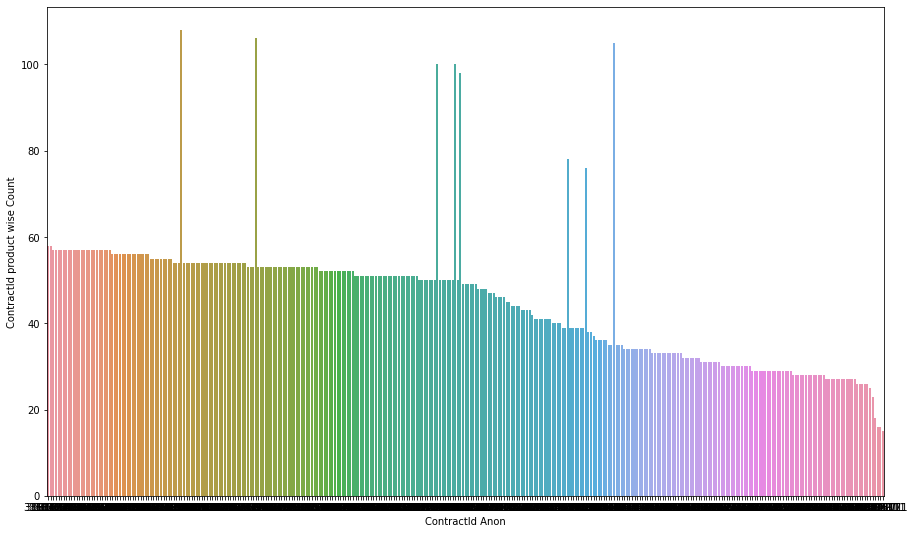

In [99]:
plt.rcParams['figure.figsize']=(15,9)
sns.barplot(x='ContractId Anon', y='ContractId product wise Count',data=scores_product_wise)

In [80]:
df['ACCESORY_NAME (copy)'].value_counts()

No Accessory    8439
TV1             6144
TV4               57
TV2               54
Name: ACCESORY_NAME (copy), dtype: int64

In [58]:
df.BASEUNIT_CONTRACTSTATUS.value_counts()

ACTIVE      14684
PAID_OFF       10
Name: BASEUNIT_CONTRACTSTATUS, dtype: int64

In [66]:
df.BASEUNIT_CONTRACTSTATUS.value_counts().values[0]/df.shape[0]

0.9993194501156935

In [67]:
df.BASEUNIT_CONTRACTSTATUS.value_counts().values[1]/df.shape[0]

0.0006805498843065196

## Observations
1. 99.93% contracts are in acitive repayment state.
2. only .068% contracts are paid off(has completed the full repayment) for the day of record.

In [45]:
df.UPSELL.value_counts().index

Index([False, True], dtype='object')

In [46]:
df.UPSELL.value_counts().values

array([10023,  4671], dtype=int64)

In [47]:
scores =df.groupby(['Score','UPSELL']).size().reset_index().rename(columns={0:'Score Count'})

In [50]:
scores

Score  UPSELL  Score Count
0      28   False           57
1      31   False           50
2      33   False           29
3      33    True           93
4      36    True           56
..    ...     ...          ...
82     87   False           28
83     88   False           44
84     88    True          158
85     89   False           41
86     90   False           55

[87 rows x 3 columns]

In [52]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [53]:
scores

Score  UPSELL  Score Count
0      28   False           57
1      31   False           50
2      33   False           29
3      33    True           93
4      36    True           56
5      37   False           53
6      39   False           69
7      40   False           52
8      40    True          107
9      41   False           26
10     41    True           29
11     42   False          108
12     43   False          183
13     44   False           43
14     44    True           54
15     46   False          105
16     47   False          231
17     48   False          165
18     48    True           33
19     49   False          283
20     49    True          161
21     50   False          115
22     50    True          109
23     51   False          168
24     51    True          246
25     52   False          109
26     52    True          157
27     53   False          228
28     53    True           91
29     54   False           57
30     54    True          250
31     56   False          370
32     56    True           39
33     57   False          168
34     57    True           57
35     58   False          506
36     58    True          125
37     59   False          336
38     59    True          247
39     60   False          298
40     60    True           57
41     61   False          413
42     61    True          214
43     62   False          588
44     62    True          194
45     63   False          406
46     63    True          159
47     64   False          287
48     64    True          230
49     66   False          252
50     66    True          137
51     67   False          254
52     67    True           55
53     68   False          337
54     68    True          117
55     69   False          490
56     69    True          158
57     70   False          301
58     70    True          348
59     71   False          441
60     71    True          201
61     72   False          161
62     72    True           57
63     73   False          276
64     73    True          276
65     74   False           79
66     74    True           28
67     76   False          416
68     76    True          112
69     77   False          248
70     77    True          111
71     78   False          113
72     78    True           54
73     79   False           92
74     80   False          346
75     80    True           51
76     81   False          145
77     82   False          176
78     83   False           48
79     83    True          100
80     84   False          147
81     86   False           30
82     87   False           28
83     88   False           44
84     88    True          158
85     89   False           41
86     90   False           55

<AxesSubplot:xlabel='Score', ylabel='Score Count'>

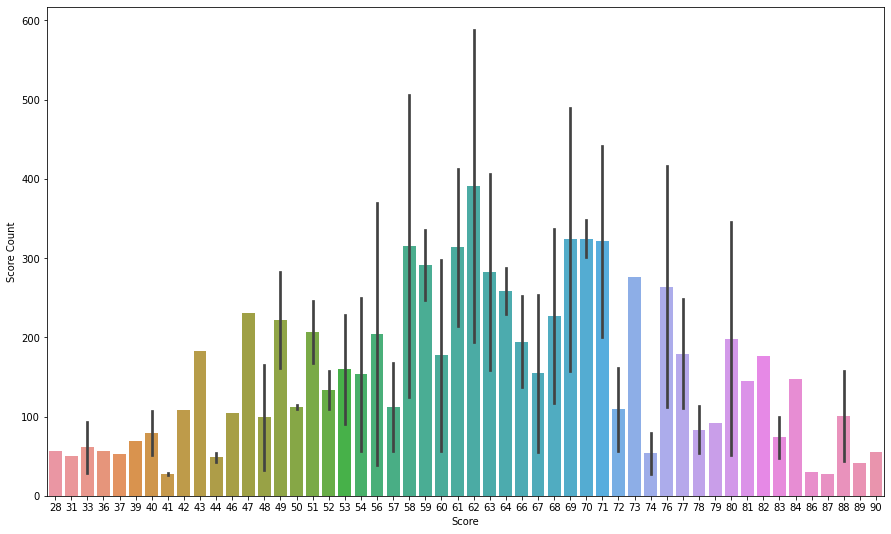

In [55]:
plt.rcParams['figure.figsize']=(15,9)
sns.barplot(x='Score', y='Score Count',data=scores)

<AxesSubplot:xlabel='Score', ylabel='Score Count'>

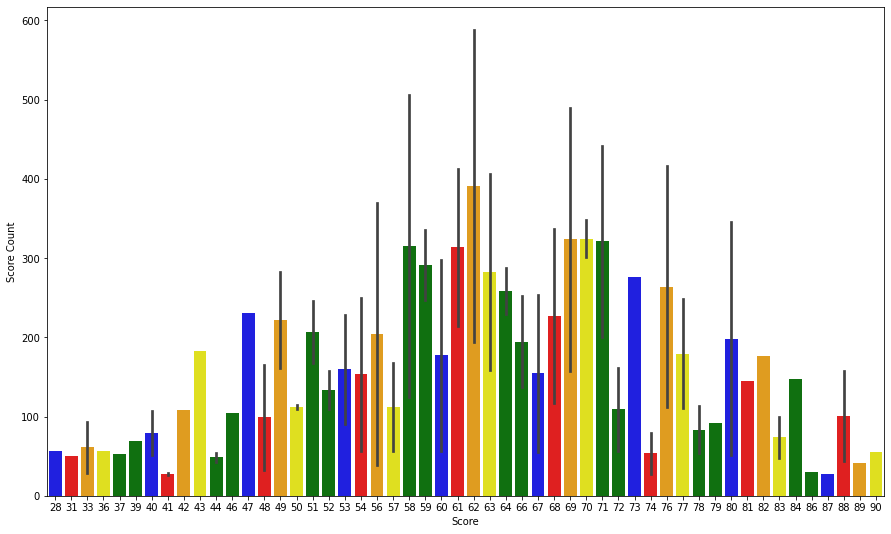

In [57]:
sns.barplot(x='Score', y='Score Count',data=scores,palette=['blue','red','orange','yellow','green','green'])

## Following are the observations from the above chart - 
1. The most of the contract id (whether the UPSELL is True or False) lies between the 1st std deviation of the above distribution. i.e. Business need to focus on the contract ids' whose score lies between 43 to 76.

In [72]:
scores_DELINQUENCY =df.groupby(['Score','DAYS_ON_BOOKS','DELINQUENCY']).size().reset_index().rename(columns={0:'Score Count'})

In [73]:
scores_DELINQUENCY

Score  DAYS_ON_BOOKS  DELINQUENCY  Score Count
0        28              0           -2            1
1        28              1           -1            1
2        28              2           -1            1
3        28              3           -1            1
4        28              4           -2            1
5        28              5           -2            1
6        28              6           -2            1
7        28              7           -3            1
8        28              8           -3            1
9        28              9           -2            1
10       28             10           -2            1
11       28             11           -3            1
12       28             12           -3            1
13       28             13           -3            1
14       28             14           -3            1
15       28             15           -3            1
16       28             16           -3            1
17       28             17           -2            1
18       28             18           -3            1
19       28             19           -3            1
20       28             20           -2            1
21       28             21           -2            1
22       28             22           -2            1
23       28             23           -1            1
24       28             24           -2            1
25       28             25           -2            1
26       28             26           -2            1
27       28             27           -2            1
28       28             28           -3            1
29       28             29           -3            1
30       28             30           -2            1
31       28             31           -2            1
32       28             32           -3            1
33       28             33           -3            1
34       28             34           -2            1
35       28             35           -2            1
36       28             36           -2            1
37       28             37           -4            1
38       28             38           -3            1
39       28             39           -3            1
40       28             40           -2            1
41       28             41           -2            1
42       28             42           -3            1
43       28             43           -2            1
44       28             44           -3            1
45       28             45           -2            1
46       28             46           -3            1
47       28             47           -2            1
48       28             48           -2            1
49       28             49           -2            1
50       28             50           -2            1
51       28             51           -2            1
52       28             52           -3            1
53       28             53           -3            1
54       28             54           -2            1
55       28             55           -2            1
56       28             56           -2            1
57       31              0           -3            1
58       31              1           -2            1
59       31              2           -2            1
60       31              3           -2            1
61       31              4           -2            1
62       31              5           -2            1
63       31              6           -1            1
64       31              7           -1            1
65       31              8           -1            1
66       31              9           -1            1
67       31             10           -1            1
68       31             11           -1            1
69       31             12           -1            1
70       31             13           -1            1
71       31             14           -1            1
72       31             15           -1            1
73       31             16            0            1
74       31             17     